# Project: Diabetes Prediction

## Description:
> The goal of this project is to develop a machine learning model that can predict the likelihood of an individual having    diabetes based on certain features or risk factors. This project focuses on binary classification, where the outcome  variable is either "diabetic" or "non-diabetic".

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
df = pd.read_csv("diabetes.csv")
print("Successfully Imported Data!")
df.head()

Successfully Imported Data!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Shape of dataset

In [3]:
df.shape

(768, 9)

# DataTypes of dataset

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Description about features

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
max = list(df.max())
min = list(df.min())
pd.DataFrame(np.array([max,min]),index=["max_value", "min_value"],columns=[df.columns])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
max_value,17.0,199.0,122.0,99.0,846.0,67.1,2.420,81.0,1.0
min_value,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0


# Finding null values

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outcome unique value counts

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Replace any "0" value for feature by mean of specific feature

In [9]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [10]:
df.groupby('Outcome')

In [11]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


# Separating Input and Output

In [12]:
X = df.drop(['Outcome'],axis =1)
y = df['Outcome']

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Data Standardization

In [15]:
std_scale = StandardScaler()

In [16]:
std_scale.fit(X)

StandardScaler()

In [17]:
standardized_data =std_scale.fit_transform(X)

In [18]:
standardized_data

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [19]:
X = standardized_data
Y = df['Outcome']

In [20]:
X

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

# Splitting the dataset into train and test by 80-20% respectively

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

 # Splitted Dataset


In [22]:
X_train

array([[-0.84488505,  0.07622239,  0.14413508, ..., -0.67688482,
        -1.12311057, -0.27575966],
       [-0.84488505, -0.87721708,  0.80485303, ...,  0.37101346,
        -0.72143478,  0.83038113],
       [-1.14185152, -0.91009431, -0.18622389, ...,  1.6081156 ,
        -0.37714125, -1.04154944],
       ...,
       [ 0.04601433,  0.10909961, -0.18622389, ..., -0.51678925,
         2.02989333,  1.00055664],
       [-0.25095213, -0.1867954 ,  0.14413508, ..., -0.89519697,
        -1.10196973, -0.78628618],
       [ 0.04601433, -0.38405874, -0.51658286, ..., -0.08016497,
        -0.00264654, -0.36084741]])

In [23]:
X_test

array([[-0.54791859, -1.10735764,  0.14413508, ..., -0.50223511,
        -0.73351526, -0.95646168],
       [-0.54791859,  0.2406085 ,  0.97003251, ..., -0.64777654,
        -0.56740873, -0.53102292],
       [-1.14185152, -0.64707652,  0.47449405, ...,  0.29824274,
        -0.70633419, -0.78628618],
       ...,
       [-1.14185152,  0.33924017,  0.47449405, ..., -0.00739425,
        -0.23821579, -1.04154944],
       [ 0.3429808 ,  0.50362629,  2.95218635, ...,  2.37948516,
        -0.73955549,  0.31985461],
       [-0.84488505, -1.60051599, -1.83801875, ..., -1.37548368,
        -0.676133  , -1.04154944]])

In [24]:
y_train

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64

In [25]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64

# 1) Logistic Regression 

In [26]:
# Choosing Logistic Regression 
lg_reg = LogisticRegression()

# Fitting the training data
lg_reg.fit(X_train,y_train)

# Predict with training data
lg_reg_train_predict = lg_reg.predict(X_train)                             

# Accuracy Score for Training data
lg_reg_train_accuracy = accuracy_score(lg_reg_train_predict, y_train)

# Printing the accuracy for training dataset
print("The accuracy score for training data is : ", lg_reg_train_accuracy)

# Predict with testing data
lg_reg_test_predict = lg_reg.predict(X_test)   

# Accuracy Score for Testing data
lg_reg_test_accuracy = accuracy_score(lg_reg_test_predict, y_test)

#printing the accuracy for training dataset
print("The accuracy score for testing data is : ", lg_reg_test_accuracy)

The accuracy score for training data is :  0.7785016286644951
The accuracy score for testing data is :  0.7662337662337663


# 2) DECISION TREE

In [27]:
X = df.drop(['Outcome'],axis =1)
y = df['Outcome']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [29]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128.0,78.0,20.536458,79.799479,21.1,0.268,55
358,12,88.0,74.0,40.000000,54.000000,35.3,0.378,48
143,10,108.0,66.0,20.536458,79.799479,32.4,0.272,42
674,8,91.0,82.0,20.536458,79.799479,35.6,0.587,68
121,6,111.0,64.0,39.000000,79.799479,34.2,0.260,24
...,...,...,...,...,...,...,...,...
73,4,129.0,86.0,20.000000,270.000000,35.1,0.231,23
400,4,95.0,64.0,20.536458,79.799479,32.0,0.161,31
118,4,97.0,60.0,23.000000,79.799479,28.2,0.443,22
701,6,125.0,78.0,31.000000,79.799479,27.6,0.565,49


In [30]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
567,6,92.0,62.000000,32.000000,126.000000,32.0,0.085,46
123,5,132.0,80.000000,20.536458,79.799479,26.8,0.186,69
615,3,106.0,72.000000,20.536458,79.799479,25.8,0.207,27
492,4,99.0,68.000000,38.000000,79.799479,32.8,0.145,33
288,4,96.0,56.000000,17.000000,49.000000,20.8,0.340,26
...,...,...,...,...,...,...,...,...
432,1,80.0,74.000000,11.000000,60.000000,30.0,0.527,22
480,3,158.0,70.000000,30.000000,328.000000,35.5,0.344,35
7,10,115.0,69.105469,20.536458,79.799479,35.3,0.134,29
564,0,91.0,80.000000,20.536458,79.799479,32.4,0.601,27


In [31]:
y_train

140    0
358    0
143    1
674    0
121    0
      ..
73     0
400    1
118    0
701    1
206    1
Name: Outcome, Length: 614, dtype: int64

In [32]:
y_test

567    0
123    0
615    0
492    0
288    0
      ..
432    0
480    1
7      0
564    0
40     0
Name: Outcome, Length: 154, dtype: int64

# Choosing Decision Tree(normal without any parameter)

In [33]:
# Choosing Decision Tree(normal without any parameter)
dt_model = DecisionTreeClassifier()

# Fitting the training data
dt_model.fit(X_train,y_train)

# Predict with training data
dt_model_train_predict = dt_model.predict(X_train)                             

# Accuracy Score for Training data
dt_model_train_accuracy = accuracy_score(dt_model_train_predict, y_train)

# Printing the accuracy for training dataset
print("The accuracy score for training data is : ", dt_model_train_accuracy)

# Predict with testing data
dt_model_test_predict = dt_model.predict(X_test)   

# Accuracy Score for Testing data
dt_model_test_accuracy = accuracy_score(dt_model_test_predict, y_test)

# Printing the accuracy for training dataset
print("The accuracy score for testing data is : ", dt_model_test_accuracy)

The accuracy score for training data is :  1.0
The accuracy score for testing data is :  0.7272727272727273


# Decision tree plot

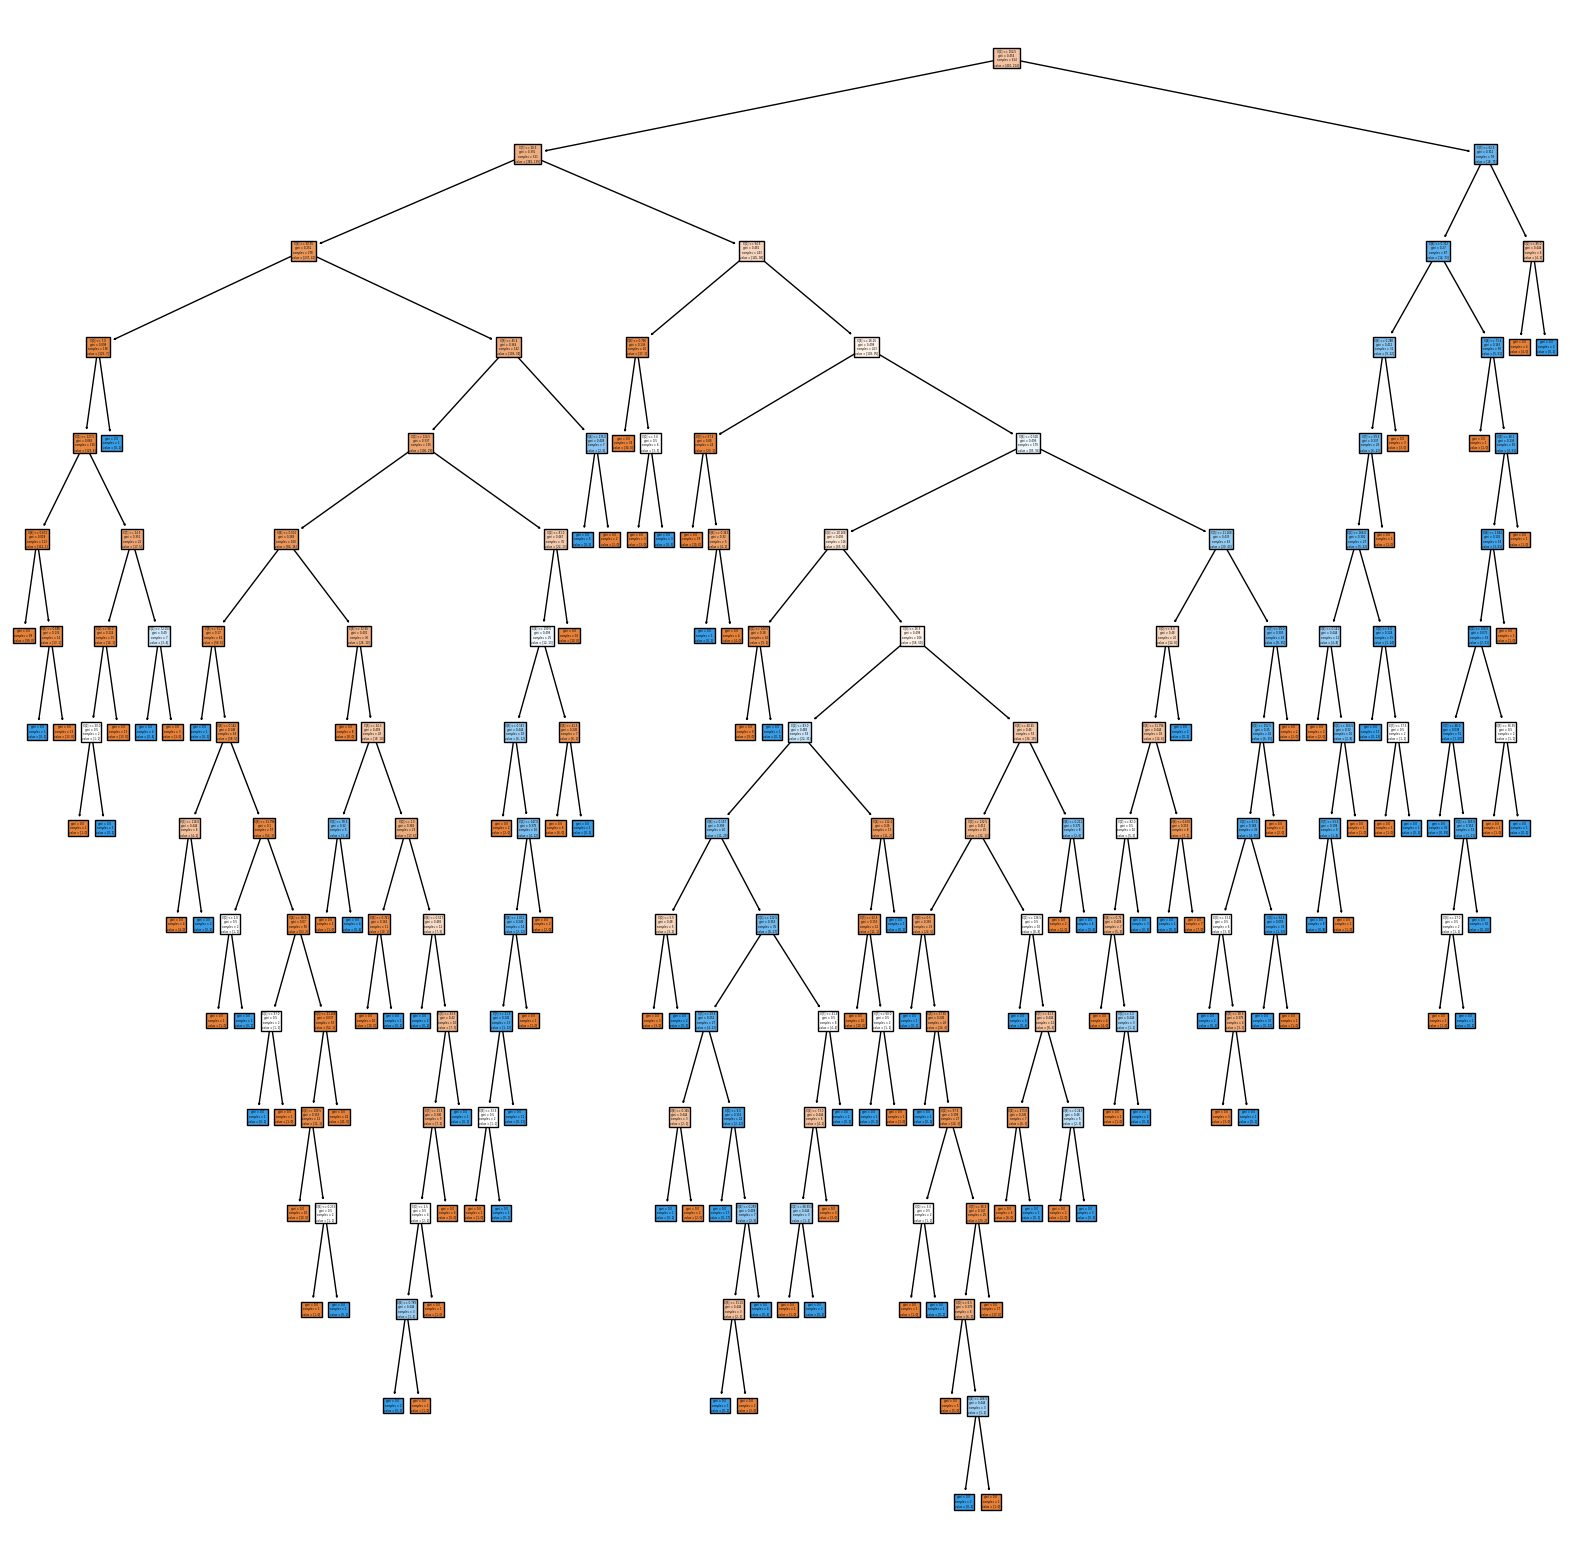

In [34]:
plt.figure(figsize = (20, 20))
tree.plot_tree(dt_model, filled= True)
plt.show()

# Choosing Decision Tree(with  parameter)

In [35]:
dt_model_2 = DecisionTreeClassifier(random_state = 6)
dt_model_2.fit(X_train,y_train)

#parameters set uses for finding best parameter
grid_pram = {"criterion" : ['gini','entropy'],
             "splitter" : ['best', 'random'],
             "max_depth" : range(2,40,1),
             "min_samples_split" : range(2,10,1),
             "min_samples_leaf" : range(1,10,1),
             }

grid_ccp = GridSearchCV(estimator=dt_model_2, param_grid= grid_pram, cv = 5, n_jobs= -1)

In [36]:
grid_ccp.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [37]:
grid_ccp.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'splitter': 'random'}

In [38]:
dt_model_3 = DecisionTreeClassifier(criterion= 'gini',max_depth= 12,min_samples_leaf = 8,min_samples_split = 2,splitter = 'random')

In [39]:
# Fitting the training data
dt_model_3.fit(X_train,y_train)

# Predict with training data
dt_model_3_train_predict = dt_model_3.predict(X_train)                             

# Accuracy Score for Training data
dt_model_3_train_accuracy = accuracy_score(dt_model_3_train_predict, y_train)

# Printing the accuracy for training dataset
print("The accuracy score for training data is : ", dt_model_3_train_accuracy)

# Predict with testing data
dt_model_3_test_predict = dt_model_3.predict(X_test)   

# Accuracy Score for Testing data
dt_model_3_test_accuracy = accuracy_score(dt_model_3_test_predict, y_test)

# Printing the accuracy for training dataset
print("The accuracy score for testing data is : ", dt_model_3_test_accuracy)

The accuracy score for training data is :  0.7931596091205212
The accuracy score for testing data is :  0.8181818181818182


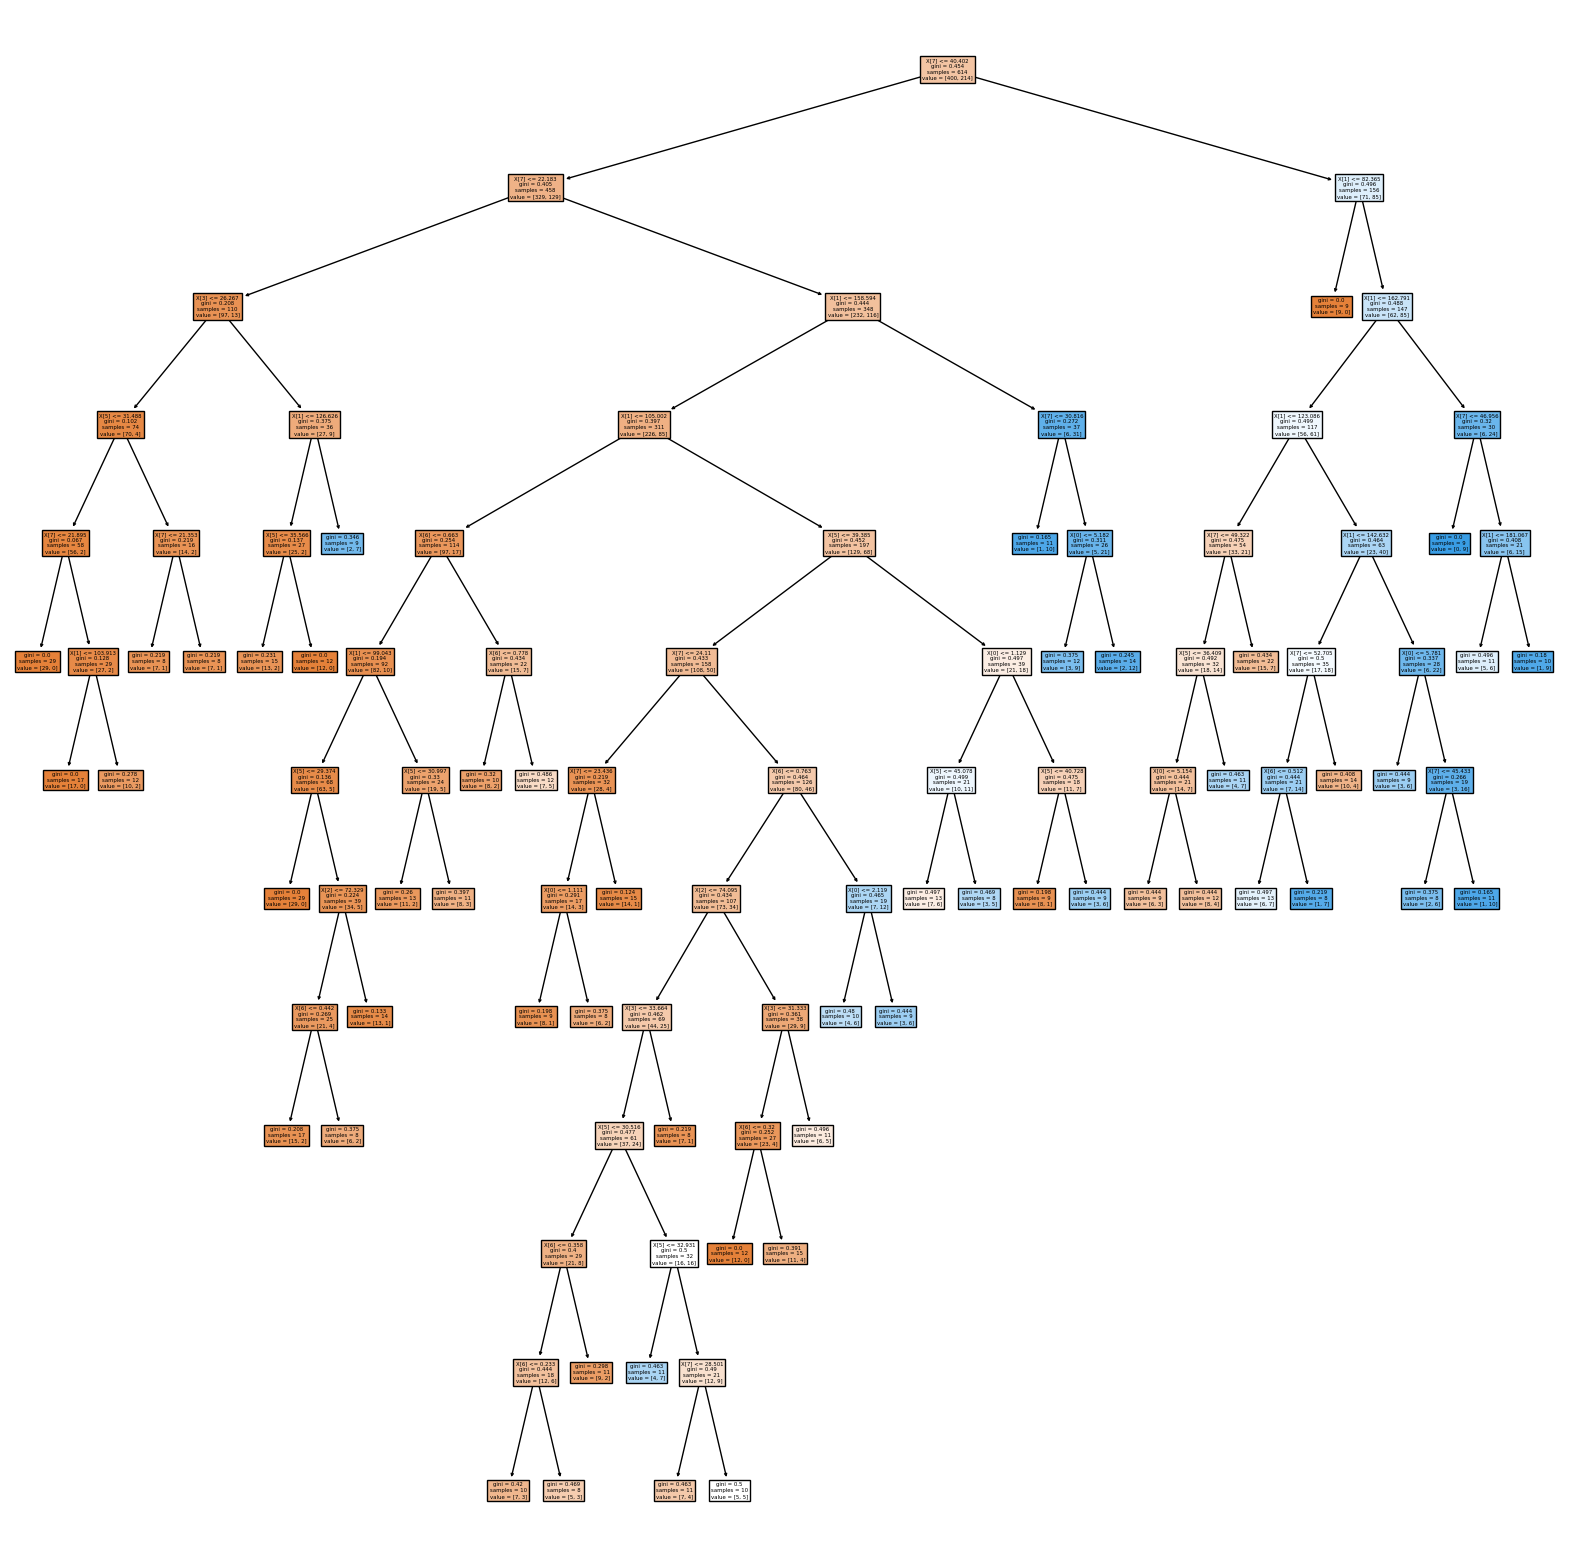

In [40]:
plt.figure(figsize = (20, 20))
tree.plot_tree(dt_model_3, filled= True)
plt.show()

# 3) RandomForest Classifier

In [41]:
# Choosing RandomForest Classifier(normal without any parameter)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model
rf_classifier.fit(X_train,y_train)

# Predict with training data
rf__train_predict = rf_classifier.predict(X_train)

# Accuracy Score for Training data
rf_train_accuracy = accuracy_score(rf__train_predict,y_train)

# Printing the accuracy for training dataset
print("The accuracy Score for Training Data : " , rf_train_accuracy)

# Predict with testing data
rf_test_predict = rf_classifier.predict(X_test)

# Accuracy Score for Training data
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)

# Printing the accuracy for training dataset
print("The accuracy Score for Testing Data : " , rf_test_accuracy)

The accuracy Score for Training Data :  1.0
The accuracy Score for Testing Data :  0.7987012987012987


# Result

In [42]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree_1','Decision Tree_2' ,'Random Forest'],
    'Score': [lg_reg_test_accuracy,dt_model_test_accuracy,dt_model_3_test_accuracy,rf_test_accuracy]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                        Model
Score                        
0.818182      Decision Tree_2
0.798701        Random Forest
0.766234  Logistic Regression
0.727273      Decision Tree_1


# Conclusion

> Based on the updated scores provided, the Decision Tree_2 model has the highest score of 0.818182, followed closely by the Random Forest model with a score of 0.798701. The Logistic Regression model has a score of 0.766234, and the Decision Tree_1 model has the lowest score of 0.727273.

> It seems that the Decision Tree_2 model has performed the best among the listed models, with the highest score. Decision Tree_2 may have been trained with different parameters or on a different dataset compared to Decision Tree_1, resulting in improved performance.

> The Random Forest model still performs well, although slightly lower than the Decision Tree_2 model. Random Forest combines multiple decision trees and typically provides robust predictions by reducing overfitting and capturing complex relationships in the data.

> Logistic Regression is the next best-performing model with a score of 0.766234. Logistic Regression is a linear model used for binary classification and can perform well depending on the nature of the dataset and the relationship between the features and target variable.

> The Decision Tree_1 model has the lowest score of 0.727273, indicating that it may not perform as well as the other models on the given dataset. Decision trees can sometimes struggle with capturing complex patterns and may overfit or underfit the data if not properly tuned.


# Save the model using pickle

In [51]:
# Save the model
import pickle

#save the model as pickle file
pickle.dump(dt_model_3,open('model_for_diabetes.pkl','wb'))

#load the saved model
model_for_diabetes = pickle.load(open('model_for_diabetes.pkl','rb'))


In [52]:
model_for_diabetes

DecisionTreeClassifier(max_depth=12, min_samples_leaf=8, splitter='random')